In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 50)

#### Data Understanding

In [2]:
# Read the dataset
bike = pd.read_csv('day.csv')

# Check top 5 rows
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of dataset
bike.shape

(730, 16)

In [4]:
# Overall Info
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


##### Finding: Given dataset contains 730 rows - 16 columns and except date all other cols are numerical

#### Data Quality Check

In [6]:
# Percentage of missing values in each column
round(100*(bike.isnull().sum()/len(bike)), 2).sort_values(ascending=False)

cnt           0.0
registered    0.0
casual        0.0
windspeed     0.0
hum           0.0
atemp         0.0
temp          0.0
weathersit    0.0
workingday    0.0
weekday       0.0
holiday       0.0
mnth          0.0
yr            0.0
season        0.0
dteday        0.0
instant       0.0
dtype: float64

In [7]:
# Percentage of missing values in rows
round((bike.isnull().sum(axis=1)/len(bike))*100,2).sort_values(ascending=False)

729    0.0
250    0.0
248    0.0
247    0.0
246    0.0
      ... 
484    0.0
483    0.0
482    0.0
481    0.0
0      0.0
Length: 730, dtype: float64

##### Finding: There are no missing or null values in columns or rows

In [8]:
bike_dup = bike.copy()

# Duplicate check
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

##### Finding: As shape of both the dataframe is same. So, there is no duplicate values in dataset

In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Data Preparation
Dropping unnecessary col as Instant(it's an index no.),dteday(Date as we've year,month & day) and casual/registered(as we've cnt = casual+registered)

In [10]:
# New dataframe with selected columns
bike_new=bike[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 
               'windspeed', 'cnt']]

In [11]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variable Creation

In [12]:
# Converting numerical to categorical
dummy_fields = ['season', 'weathersit', 'mnth', 'weekday']
for each in dummy_fields:
    bike_new[each]=bike_new[each].astype('category')

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null category
yr            730 non-null int64
mnth          730 non-null category
holiday       730 non-null int64
weekday       730 non-null category
workingday    730 non-null int64
weathersit    730 non-null category
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [14]:
# Thes code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for the respective dummy
# 3) Drop first dummy variable for each set

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

In [15]:
# Check the shape
bike_new.shape

(730, 30)

#### Data Visualizations

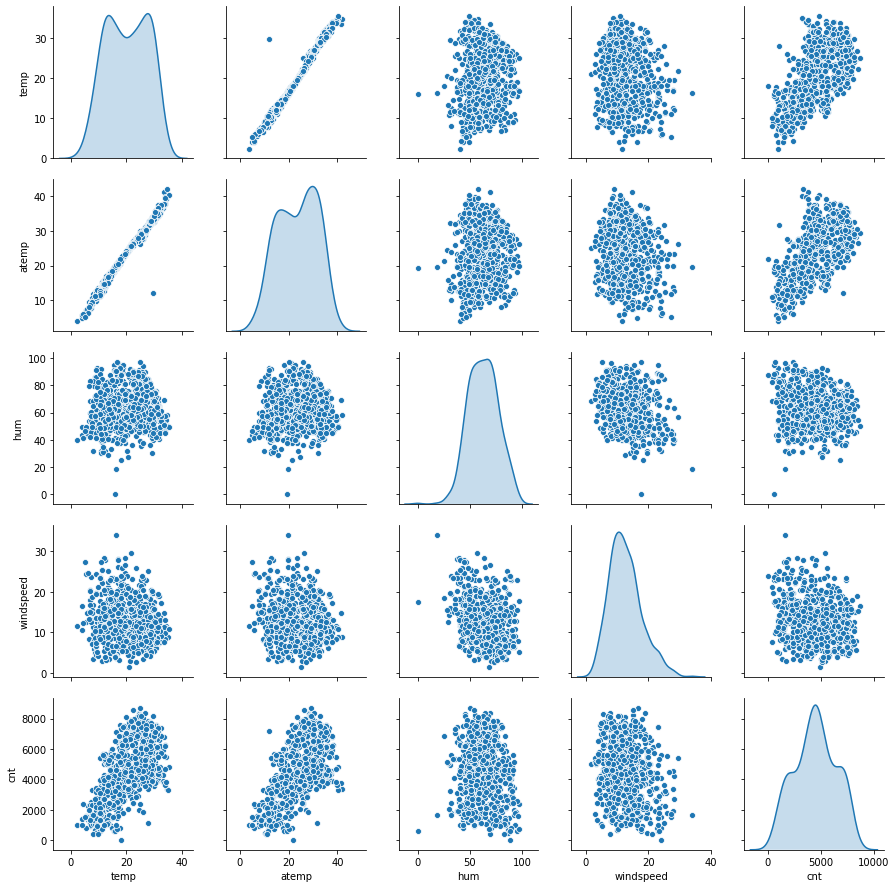

In [16]:
# Create a new dataframe with numeric variables:
bike_num=bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
# Visualizing numerical data
sns.pairplot(bike_num, diag_kind='kde')
plt.show()

##### Finding: There is a strong linear relationship between temp, atemp and cnt

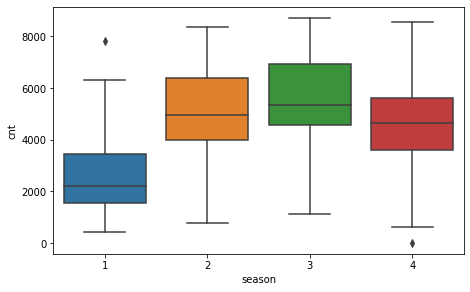

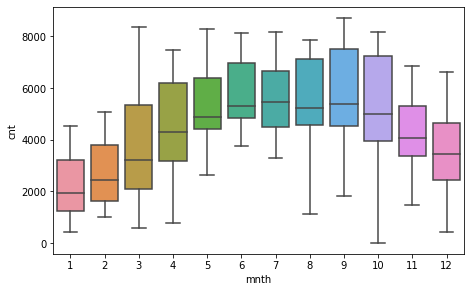

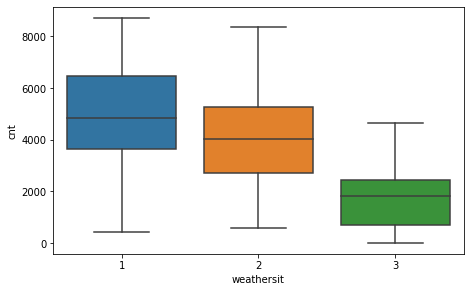

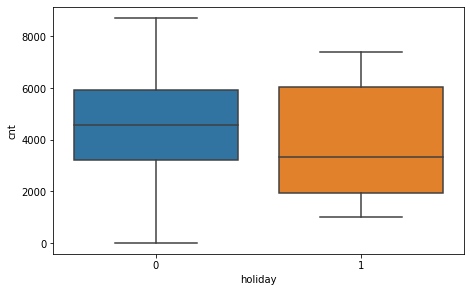

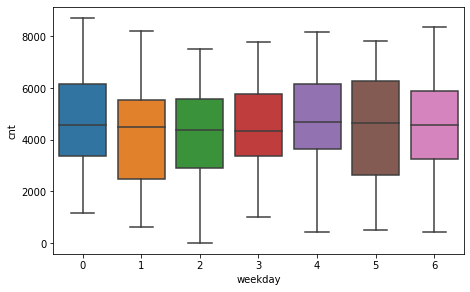

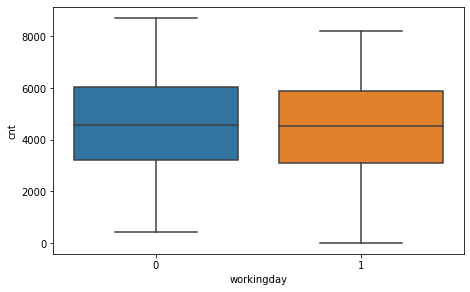

In [17]:
# creating new df with categorical values
bike_cat=bike[[ 'season', 'mnth', 'weathersit', 'holiday','weekday', 'workingday']]

i=1
for item in bike_cat:
    plt.figure(figsize=(25, 10))
    plt.subplot(2,3,i)
    sns.boxplot(x = item, y = 'cnt', data = bike)
    plt.show()
    i= i+1

##### 6 categorical variables in the dataset is plotted using Box plot vs target variable 

#### Findings: 

1. season: Almost 32% of the bike booking is in season3 with a median of 5000 booking followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable 

2. mnth: Almost 10% of the bike booking is in the months 5,6,7,8 & 9 with a median of 4000 booking/month. This indicates, mnth has some trend with bookings and can be a good predictor for the dependent variable 

3. weathersit: Almost 67% of the bike booking is during weathersit1 with a median close to 5000 booking followed by weathersit2 with 30% of total booking. This indicates, weathersit has some trend towards the bike bookings can be a good predictor for the dependent variable 

4. holiday: Almost 97.6% of the bike booking is on non-holiday, the data seems clearly biased 

5. weekday: It shows close trend (between 13.5%-14.8% of total booking on all days of the week) with an independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor, need to validate with further model building steps 

6. workingday: Almost 69% of the bike booking is on ‘workingday’ with a median of close to 5000 booking. This indicates, workingday can be a good predictor for the dependent variable 

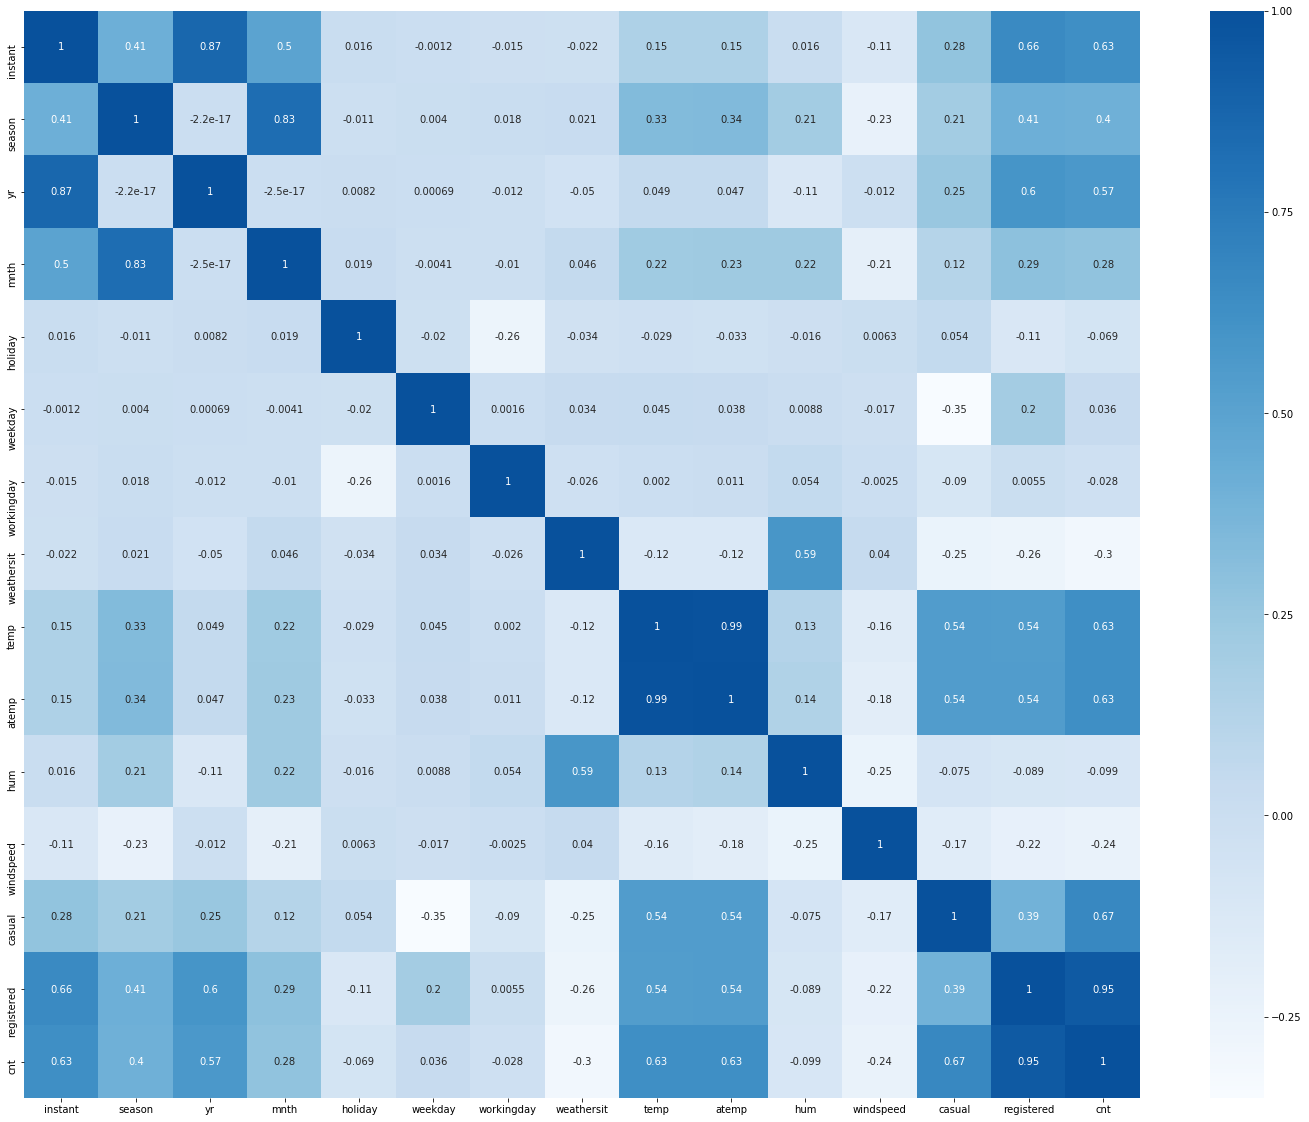

In [18]:
# Correlation matrix 

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="Blues", center=0.423)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

##### Finding: The heatmap confirms the presence of multicollinear variable and also highlight independent variables those are highly collinear with target variable

#### Train - Test Data Split into 70:30 Ratio

In [19]:
# Specifying'random_state' to keep train and test data set always same
np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, random_state = 333)

In [20]:
df_train.shape

(510, 30)

In [21]:
df_test.shape

(220, 30)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 650 to 419
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null int64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4 

In [23]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [24]:
# Scaling of numerical variables
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
714,1,0,1,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
8,0,0,1,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
502,1,0,0,0.629300,0.619631,0.543723,0.235894,0.876323,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [25]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.690196,0.540777,0.515530,0.647696,0.346806,0.514508,0.245098,0.262745,0.241176,0.084314,0.078431,0.082353,0.092157,0.072549,0.078431,0.098039,0.082353,0.084314,0.086275,0.076471,0.141176,0.152941,0.131373,0.139216,0.147059,0.143137,0.343137,0.025490
std,0.500487,0.151726,0.462867,0.227939,0.213652,0.149805,0.160182,0.224150,0.430568,0.440557,0.428217,0.278131,0.269113,0.275172,0.289531,0.259649,0.269113,0.297660,0.275172,0.278131,0.281045,0.266010,0.348545,0.360284,0.338139,0.346511,0.354512,0.350557,0.475223,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.231105,0.359468,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646584,0.326920,0.516107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.758008,0.434607,0.683473,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Building Linear Regression Model

In [26]:
# #Dividing data into X and y variables
y_train = df_train.pop('cnt')
X_train = df_train

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 

In [28]:
# RFE with default variable = 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 10),
 ('mnth_3', True, 1),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 7),
 ('mnth_7', False, 15),
 ('mnth_8', False, 9),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 12),
 ('mnth_12', False, 13),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', False, 2),
 ('weekday_4', False, 4),
 ('weekday_5', False, 3),
 ('weekday_6', False, 14),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_9', 'mnth_10', 'weekday_1', 'weekday_2',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [30]:
# Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,temp,atemp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_9,mnth_10,weekday_1,weekday_2,weathersit_2,weathersit_3
650,1,0.416433,0.409971,0.513852,0.255118,0,0,1,0,0,1,0,0,0,0
212,0,0.887856,0.819376,0.572294,0.276919,0,1,0,0,0,0,0,0,0,0
714,1,0.378013,0.381804,0.871429,0.161523,0,0,1,0,0,0,1,0,1,0
8,0,0.098690,0.048706,0.451083,0.700017,0,0,0,0,0,0,0,1,0,0
502,1,0.629300,0.619631,0.543723,0.235894,1,0,0,0,0,0,0,0,0,0


In [31]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

#### Model 1

In [32]:
checkVIF(X_train_rfe)

,Features,VIF
1,temp,385.75
2,atemp,363.51
3,hum,16.16
6,season_3,7.09
4,windspeed,4.53
5,season_2,3.51
7,season_4,3.00
13,weathersit_2,2.16
0,yr,2.02
10,mnth_10,1.67


In [33]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.61e-185
Time:                        01:58:55   Log-Likelihood:                 506.93
No. Observations:                 510   AIC:                            -981.9
Df Residuals:                     494   BIC:                            -914.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2378      0.028      8.430   

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [34]:
# Removing atemp based on its high p-value and VIF
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)

#### Model 2

In [35]:
checkVIF(X_train_new)

,Features,VIF
1,temp,23.17
2,hum,15.87
5,season_3,6.99
3,windspeed,4.37
4,season_2,3.50
6,season_4,2.99
12,weathersit_2,2.15
0,yr,2.02
9,mnth_10,1.67
8,mnth_9,1.28


In [36]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.5
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.42e-186
Time:                        01:58:55   Log-Likelihood:                 506.72
No. Observations:                 510   AIC:                            -983.4
Df Residuals:                     495   BIC:                            -919.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2390      0.028      8.501   

In [37]:
# Removing weekday_1 based on its high p-value
X_train_new = X_train_new.drop(['weekday_1'], axis = 1)

#### Model 3

In [38]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,temp,23.00
2,hum,15.37
5,season_3,6.97
3,windspeed,4.34
4,season_2,3.50
6,season_4,2.99
11,weathersit_2,2.14
0,yr,2.02
9,mnth_10,1.66
8,mnth_9,1.28


In [39]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          8.26e-187
Time:                        01:58:55   Log-Likelihood:                 504.52
No. Observations:                 510   AIC:                            -981.0
Df Residuals:                     496   BIC:                            -921.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2360      0.028      8.377   

In [40]:
# Removing hum based on its high VIF
X_train_new = X_train_new.drop(['hum'], axis = 1)

#### Model 4

In [41]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,temp,15.15
4,season_3,6.65
2,windspeed,3.82
3,season_2,3.47
5,season_4,2.87
0,yr,2.02
8,mnth_10,1.66
10,weathersit_2,1.51
7,mnth_9,1.27
6,mnth_3,1.18


In [42]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          2.48e-183
Time:                        01:58:55   Log-Likelihood:                 493.48
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     497   BIC:                            -905.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1339      0.018      7.349   

In [43]:
# Removing season_3 based on its high VIF
X_train_new = X_train_new.drop(['season_3'], axis = 1)

#### Model 5

In [44]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,temp,4.02
2,windspeed,3.65
0,yr,2.00
4,season_4,1.93
7,mnth_10,1.63
3,season_2,1.56
9,weathersit_2,1.50
6,mnth_9,1.23
8,weekday_2,1.18
5,mnth_3,1.13


In [45]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.7
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.30e-180
Time:                        01:58:56   Log-Likelihood:                 484.24
No. Observations:                 510   AIC:                            -944.5
Df Residuals:                     498   BIC:                            -893.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1185      0.018      6.521   

In [46]:
# Removing mnth_10 as p-value is very high
X_train_new = X_train_new.drop(['mnth_10'], axis = 1)

#### Model 6

In [47]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,temp,3.92
2,windspeed,3.60
0,yr,1.99
3,season_2,1.55
8,weathersit_2,1.50
4,season_4,1.38
6,mnth_9,1.20
7,weekday_2,1.18
5,mnth_3,1.13
9,weathersit_3,1.07


In [48]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     232.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.37e-180
Time:                        01:58:56   Log-Likelihood:                 481.36
No. Observations:                 510   AIC:                            -940.7
Df Residuals:                     499   BIC:                            -894.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1159      0.018      6.360   

In [49]:
# Removing weekday_2
X_train_new = X_train_new.drop(['weekday_2'], axis = 1)

#### Model 7

In [50]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,temp,3.88
2,windspeed,3.58
0,yr,1.99
3,season_2,1.55
7,weathersit_2,1.50
4,season_4,1.37
6,mnth_9,1.20
5,mnth_3,1.13
8,weathersit_3,1.07


In [51]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.22e-180
Time:                        01:58:57   Log-Likelihood:                 477.34
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     500   BIC:                            -892.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1125      0.018      6.147   

In [52]:
# Removing mnth_3
X_train_new = X_train_new.drop(['mnth_3'], axis = 1)

#### Model 8

In [53]:
X_train_new = X_train_new.drop('const',axis=1)
checkVIF(X_train_new)

,Features,VIF
1,temp,3.85
2,windspeed,3.43
0,yr,1.98
3,season_2,1.55
6,weathersit_2,1.48
4,season_4,1.35
5,mnth_9,1.19
7,weathersit_3,1.07


In [54]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.08e-179
Time:                        01:58:58   Log-Likelihood:                 473.46
No. Observations:                 510   AIC:                            -928.9
Df Residuals:                     501   BIC:                            -890.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1233      0.018      6.844   

##### Model 8 looks good, as there seems to be VERY LOW Multicollinearity between the predictors, the p-values for all the predictors seems to be significant and small difference between R-squared & Adjusted R-squared shows less noise (compared to model 6 and 7) . We can say Model 8 is able to generalize the trend better. For now, we will consider this as our final model (unless the Test data metrics are significantly different from derived model summary)

#### Residual Analysis of Model

In [55]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_pred = lm.predict(X_train_new)

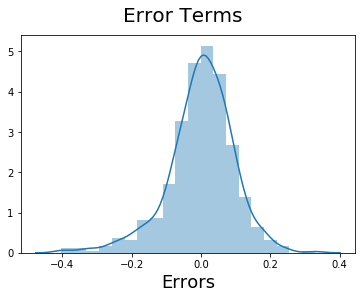

In [56]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  
plt.show()

##### Finding: As the residuals are normally distributed hence, our assumptions for linear regression is valid

#### Prediction and Evaluation

In [57]:
# Scaling test data only by transforming
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,1,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
553,1,0,1,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
504,1,0,1,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0


In [58]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.495455,0.040909,0.690909,0.550981,0.527344,0.662328,0.346015,0.519816,0.268182,0.245455,0.250,0.059091,0.100000,0.081818,0.068182,0.104545,0.100000,0.054545,0.081818,0.086364,0.072727,0.104545,0.150000,0.122727,0.168182,0.150000,0.131818,0.140909,0.322727,0.036364
std,0.501120,0.198531,0.463173,0.228967,0.214959,0.143278,0.159517,0.219880,0.444023,0.431338,0.434,0.236333,0.300684,0.274713,0.252632,0.306665,0.300684,0.227609,0.274713,0.281541,0.260281,0.306665,0.357886,0.328872,0.374881,0.357886,0.339064,0.348721,0.468586,0.187620
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.357562,0.352129,0.553355,0.232051,0.364818,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557133,0.546299,0.661688,0.327568,0.525943,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750530,0.707506,0.761905,0.435172,0.683128,1.000000,0.000000,0.250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
#Dividing into X and y
y_test = df_test.pop('cnt')
X_test = df_test

In [60]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

c:\Users\s.ag.chakraborty\AppData\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [61]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Model Evaluation

In [62]:
# Evaluation of test via comparison of y_pred and y_test
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8073464772861327

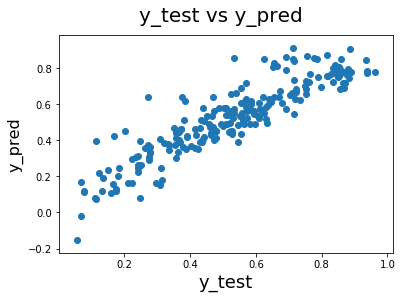

In [63]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   
plt.show()

In [64]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.08e-179
Time:                        01:58:59   Log-Likelihood:                 473.46
No. Observations:                 510   AIC:                            -928.9
Df Residuals:                     501   BIC:                            -890.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1233      0.018      6.844      0.000       0.088       0.159
yr               0.2305      0.009     26.768      0.000       0.214       0.247
temp             0.5619      0.020     27.624      0.000       0.522       0.602
windspeed       -0.1555      0.028     -5.567      0.000      -0.210      -0.101
season_2         0.0819      0.011      7.593      0.000       0.061       0.103
season_4         0.1265      0.011     11.548      0.000       0.105       0.148
mnth_9           0.0963      0.016      5.915      0.000       0.064       0.128
weathersit_2    -0.0735      0.009     -8.019      0.000      -0.091      -0.055
weathersit_3    -0.3022      0.028    -10.942      0.000      -0.356      -0.248
==============================================================================
Omnibus:                       59.362   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.157
Skew:                          -0.687   Prob(JB):                     1.63e-25
Kurtosis:                       4.867   Cond. No.                         10.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 22 to 483
Data columns (total 9 columns):
const           220 non-null float64
yr              220 non-null int64
temp            220 non-null float64
windspeed       220 non-null float64
season_2        220 non-null uint8
season_4        220 non-null uint8
mnth_9          220 non-null uint8
weathersit_2    220 non-null uint8
weathersit_3    220 non-null uint8
dtypes: float64(3), int64(1), uint8(5)
memory usage: 9.7 KB


In [66]:
# n is number of rows in X
n = X_test_new.shape[0]
r2=0.8073464772861327

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]-1

# Adjusted R-squared using formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8000420783206781

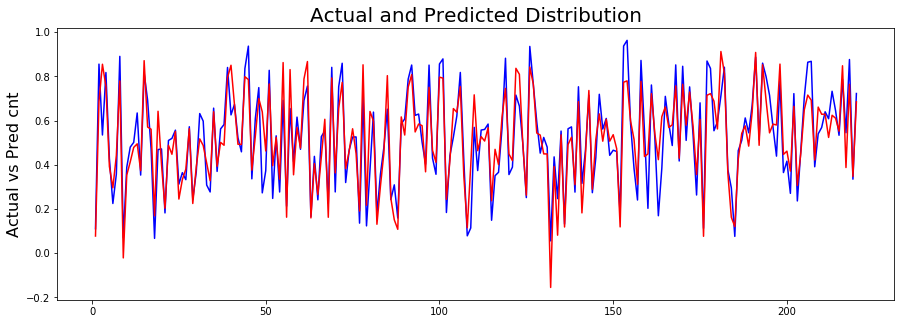

In [67]:
#Actual vs Predicted
c = [i for i in range(1,221,1)]
plt.figure(figsize=[15,5])
plt.plot(c,y_test, color="blue", linestyle="-")
plt.plot(c,y_pred, color="red",  linestyle="-")
plt.title('Actual and Predicted Distribution', fontsize=20)  # Plot heading 
plt.ylabel('Actual vs Pred cnt', fontsize=16)   
plt.show()

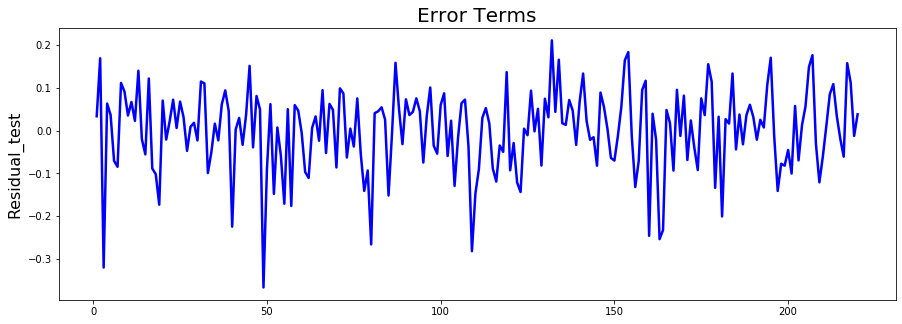

In [68]:
# Error terms
c = [i for i in range(1,221,1)]
plt.figure(figsize=[15,5])
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.ylabel('Residual_test', fontsize=16)        # Y-label
plt.show()

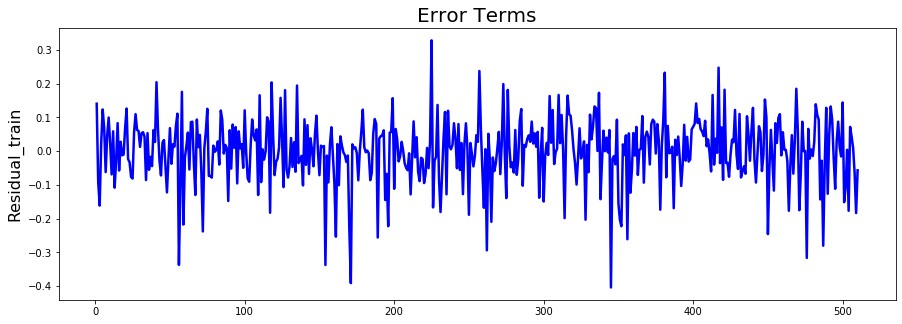

In [69]:
c = [i for i in range(1,511,1)]
plt.figure(figsize=[15,5])
plt.plot(c,y_train-y_train_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Terms', fontsize=20)              # Plot heading 
plt.ylabel('Residual_train', fontsize=16)        # Y-label
plt.show()

## Final Model Interpretation
Hypothesis Testing: 
Hypothesis testing states that: 

H0:B1=B2=...=Bn=0 
H1: at least one Bi!=0 

Model 8 coefficient values 
1. const 0.1233 
2. yr 0.2305  
3. temp 0.5619  
4. windspeed -0.1555
5. season_2 0.0819 
6. season_4 0.1265 
7. mnth_9 0.0963 
8. weathersit_2 -0.0735 
9. weathersit_3 -0.3022 

Model Summary:  
Training Data Set - 
1. R-squared: 0.82 
2. Adj. R-squared: 0.81  

Test Data Set - 
1. R-squared: 0.81 
2. Adj. R-squared: 0.80 

Inference:
From the model summary, it is evident that all our coefficients are not equal to zero, which means We REJECT the NULL HYPOTHESIS 

F Statistics:  
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model  
F-statistic: 280.8 
Prob (F-statistic): 1.08e-179  
The F-Statistics value of 280.8 and the p-value of '~0.0000' states that the overall model is significant 

The equation of best fitted surface based on model:  
cnt = 0.1233 + (yr × 0.2305) + (temp × 0.5619) − (windspeed × 0.1555) + (season_2 × 0.0819) + (season_4 ×0.1265) + (mnth_9 × 0.0963) - (weathersit_2 × 0.0735) − (weathersit_3 × 0.3022) 

Interpretation of Coefficients:  
yr: A coefficient value of ‘0.2305’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2305 units 

temp: A coefficient value of ‘0.5619’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5619 units 

windspeed: A coefficient value of ‘-0.1555’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1555 units 

season_2: A coefficient value of ‘0.0819’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.0819 units 

season_4: A coefficient value of ‘0.1265’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1265 units 

mnth_9: A coefficient value of ‘0.0963’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.0963 units 

weathersit_2: A coefficient value of ‘-0.0735’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0735 units 

weathersit_3: A coefficient value of ‘-0.3022’ indicated that, w.r.t Weathersit1, a unit increase in weathersit3 variable, decreases the bike hire numbers by 0.3022 units 

const: The Constant value of ‘0.1233’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), the bike rental can still increase by 0.1233 units 

### Based on our final Model and above inference we can deduce that the top 3 predictor variables that influences the bike booking are: Year, temperature and weather situation 3. And the next 2 important predictors are season 4 and windspeed

##### Note :- The definition of variable as per data dictionary are as follows
1. weathersit_2 => Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
2. weathersit_3 => Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
3. season_2 => Summer
4. season_4 => Winter